In [1]:
import matplotlib.pyplot as plt
from rlaopt.kernels import RBFLinOp, Matern12LinOp, Matern32LinOp, Matern52LinOp, KernelConfig
import torch

from scalable_gp_inference.random_features import RFConfig, get_random_features

In [2]:
torch.set_default_dtype(torch.float64)
torch.manual_seed(1)

In [3]:
device = torch.device("cuda:0")

n = 4
d = 10
const_scaling = 5.0
lengthscale_scalar = 2.0
lengthscale_tensor = torch.tensor([3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0], device=device)
num_features_grid = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7, 10 ** 8]

X = torch.randn(n, d, device=device) / (d ** 0.5)

idx1 = 1
idx2 = 2

In [4]:
def test_rf_fn(kernel_linop_class, kernel_type, X, const_scaling, lengthscale, num_features):
    kernel_config = KernelConfig(const_scaling=const_scaling, lengthscale=lengthscale)
    kernel_linop = kernel_linop_class(X, X, kernel_config)
    K_true = kernel_linop @ torch.eye(kernel_linop.shape[1], device=kernel_linop.device)
    rf_config = RFConfig(num_features=num_features)
    K_rf = get_random_features(X, rf_config, kernel_config, kernel_type)
    K_approx = K_rf @ K_rf.T
    return K_true - K_approx


def test_rf_fn_grid(kernel_linop_class, kernel_type, X, const_scaling, lengthscale, num_features_grid, n_trials=30, idx1=0, idx2=0):
    diffs_at_loc = {}
    for num_features in num_features_grid:
        diff = 0.0
        for _ in range(n_trials):
            K_diff = test_rf_fn(kernel_linop_class, kernel_type, X, const_scaling, lengthscale, num_features)
            diff += K_diff[idx1, idx2].item()
        diff /= n_trials
        diffs_at_loc[num_features] = abs(diff)
    return diffs_at_loc


def plot_diffs(diffs, title):
    plt.semilogy(list(diffs.keys()), list(diffs.values()))
    plt.xscale("log")
    plt.xlabel("Number of random features")
    plt.ylabel("Error")
    plt.title(title)
    plt.show()

RBF

[KeOps] Generating code for Sum_Reduction reduction (with parameters 0) of formula (d*Exp(-1/2*Sum(((a-b)/c)**2)))*e with a=Var(0,10,0), b=Var(1,10,1), c=Var(2,1,2), d=Var(3,1,2), e=Var(4,4,1) ... 

OK


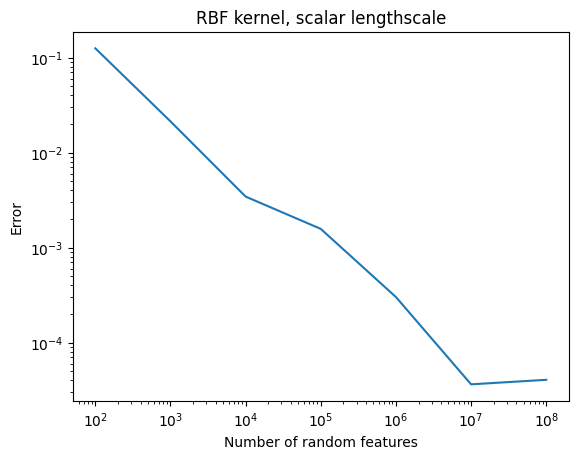

In [5]:
diffs_00 = test_rf_fn_grid(RBFLinOp, "rbf", X, const_scaling, lengthscale_scalar, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "RBF kernel, scalar lengthscale")

[KeOps] Generating code for Sum_Reduction reduction (with parameters 0) of formula (d*Exp(-1/2*Sum(((a-b)/c)**2)))*e with a=Var(0,10,0), b=Var(1,10,1), c=Var(2,10,2), d=Var(3,1,2), e=Var(4,4,1) ... OK


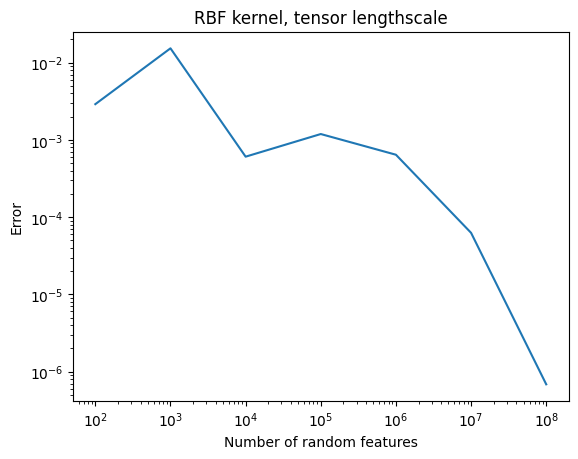

In [6]:
diffs_00 = test_rf_fn_grid(RBFLinOp, "rbf", X, const_scaling, lengthscale_tensor, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "RBF kernel, tensor lengthscale")

Matern-1/2

[KeOps] Generating code for Sum_Reduction reduction (with parameters 0) of formula (d*Exp(-Sqrt(Sum(((a-b)/c)**2))))*e with a=Var(0,10,0), b=Var(1,10,1), c=Var(2,1,2), d=Var(3,1,2), e=Var(4,4,1) ... OK


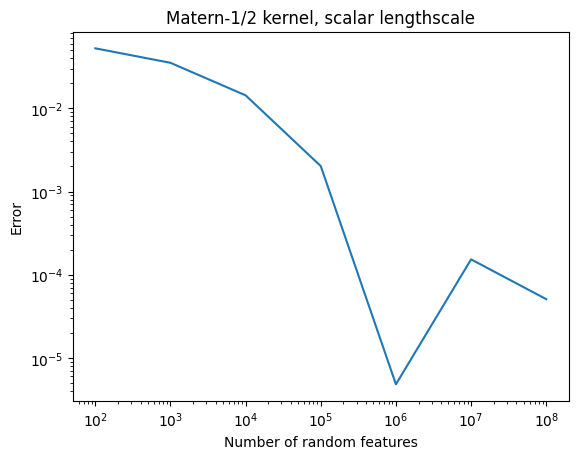

In [7]:
diffs_00 = test_rf_fn_grid(Matern12LinOp, "matern12", X, const_scaling, lengthscale_scalar, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-1/2 kernel, scalar lengthscale")

[KeOps] Generating code for Sum_Reduction reduction (with parameters 0) of formula (d*Exp(-Sqrt(Sum(((a-b)/c)**2))))*e with a=Var(0,10,0), b=Var(1,10,1), c=Var(2,10,2), d=Var(3,1,2), e=Var(4,4,1) ... OK


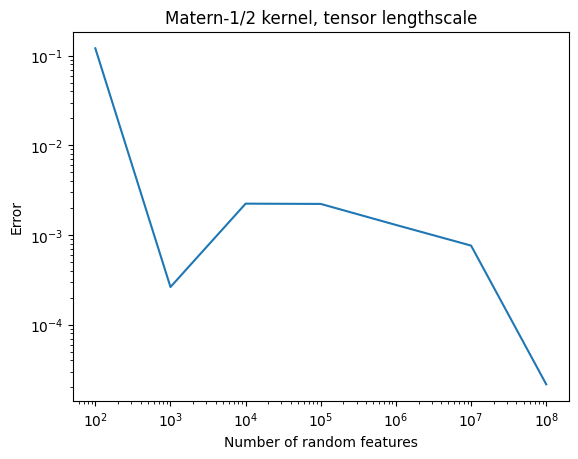

In [8]:
diffs_00 = test_rf_fn_grid(Matern12LinOp, "matern12", X, const_scaling, lengthscale_tensor, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-1/2 kernel, tensor lengthscale")

Matern-3/2

[KeOps] Generating code for Sum_Reduction reduction (with parameters 0) of formula ((f*(1+d*Sqrt(Sum(((a-b)/c)**2))))*Exp(e*Sqrt(Sum(((a-b)/c)**2))))*g with a=Var(0,10,0), b=Var(1,10,1), c=Var(2,1,2), d=Var(3,1,2), e=Var(4,1,2), f=Var(5,1,2), g=Var(6,4,1) ... OK


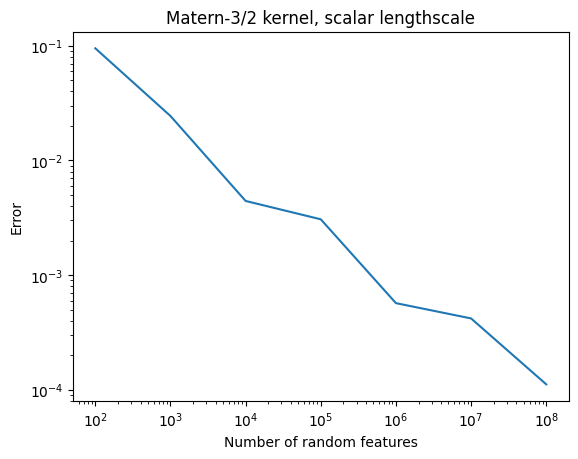

In [9]:
diffs_00 = test_rf_fn_grid(Matern32LinOp, "matern32", X, const_scaling, lengthscale_scalar, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-3/2 kernel, scalar lengthscale")

[KeOps] Generating code for Sum_Reduction reduction (with parameters 0) of formula ((f*(1+d*Sqrt(Sum(((a-b)/c)**2))))*Exp(e*Sqrt(Sum(((a-b)/c)**2))))*g with a=Var(0,10,0), b=Var(1,10,1), c=Var(2,10,2), d=Var(3,1,2), e=Var(4,1,2), f=Var(5,1,2), g=Var(6,4,1) ... OK


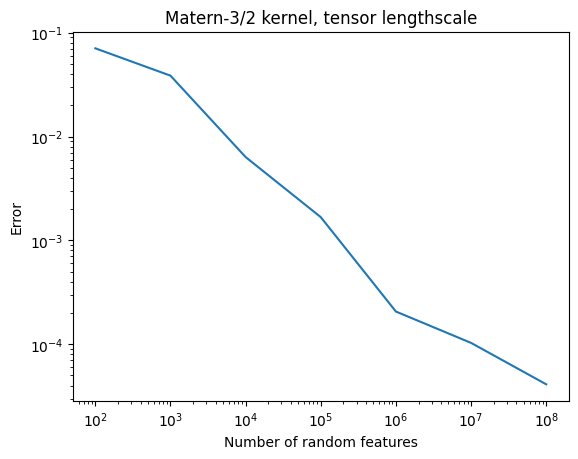

In [10]:
diffs_00 = test_rf_fn_grid(Matern32LinOp, "matern32", X, const_scaling, lengthscale_tensor, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-3/2 kernel, tensor lengthscale")

Matern-5/2

[KeOps] Generating code for Sum_Reduction reduction (with parameters 0) of formula ((g*((1+d*Sqrt(Sum(((a-b)/c)**2)))+e*Sqrt(Sum(((a-b)/c)**2))**2))*Exp(f*Sqrt(Sum(((a-b)/c)**2))))*h with a=Var(0,10,0), b=Var(1,10,1), c=Var(2,1,2), d=Var(3,1,2), e=Var(4,1,2), f=Var(5,1,2), g=Var(6,1,2), h=Var(7,4,1) ... OK


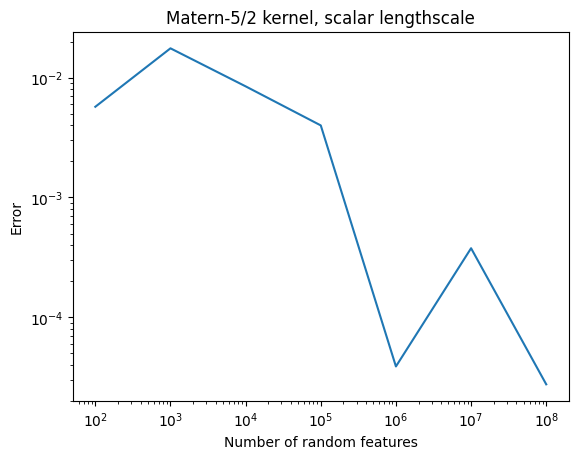

In [11]:
diffs_00 = test_rf_fn_grid(Matern52LinOp, "matern52", X, const_scaling, lengthscale_scalar, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-5/2 kernel, scalar lengthscale")

[KeOps] Generating code for Sum_Reduction reduction (with parameters 0) of formula ((g*((1+d*Sqrt(Sum(((a-b)/c)**2)))+e*Sqrt(Sum(((a-b)/c)**2))**2))*Exp(f*Sqrt(Sum(((a-b)/c)**2))))*h with a=Var(0,10,0), b=Var(1,10,1), c=Var(2,10,2), d=Var(3,1,2), e=Var(4,1,2), f=Var(5,1,2), g=Var(6,1,2), h=Var(7,4,1) ... OK


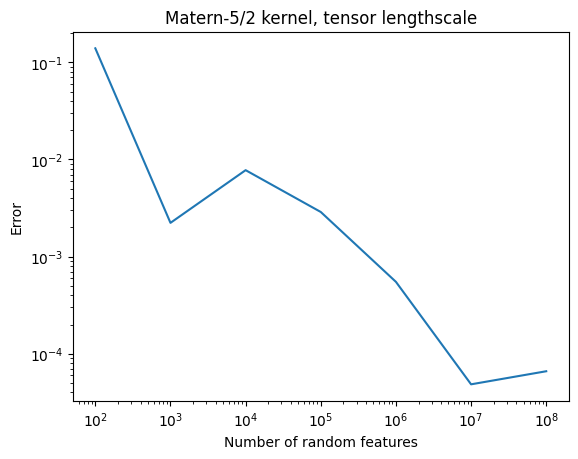

In [12]:
diffs_00 = test_rf_fn_grid(Matern52LinOp, "matern52", X, const_scaling, lengthscale_tensor, num_features_grid, idx1=idx1, idx2=idx2)
plot_diffs(diffs_00, "Matern-5/2 kernel, tensor lengthscale")